In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

## 3.1 Thu thập dữ liệu:

### 3.1.1. Code crawl dữ liệu từ trang web

In [2]:
url = "http://quotes.toscrape.com/"
response = requests.get(url)

with open("kq.txt", "w",encoding='utf-8') as f:
    f.write(response.text)

> Trang web chứa danh sách các trích dẫn nổi tiếng của các tác giả khác nhau. Cấu trúc gồm các thẻ khác nhau như html, head, title, meta, link, body, div, a, span và small. Các thẻ này được sử dụng để cấu trúc và hiển thị các thành phần khác nhau của trang web, chẳng hạn như tiêu đề, tiêu đề, trích dẫn, tác giả và các thẻ được liên kết với mỗi trích dẫn. Các trích dẫn và tác giả của chúng được hiển thị bằng các thẻ span và small tương ứng, và các thẻ được hiển thị bằng thẻ a.

### 3.1.2. Xử lí dữ liệu crawl về:

* Đọc tất cả các thẻ html (div) với lớp là 'quote', lưu kết quả vào biến result

In [3]:
with open("kq.txt", "r",encoding='utf-8') as f:
    content = f.read()
    soup = BeautifulSoup(content, "html.parser")
    result = soup.find_all("div", class_="quote")
    print(result)

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

* Tìm trong result các dữ liệu chứa nhãn 'small' với class là 'author'

In [4]:
authors = [item.find("small", class_="author").text for item in result]
print(authors)

['Albert Einstein', 'J.K. Rowling', 'Albert Einstein', 'Jane Austen', 'Marilyn Monroe', 'Albert Einstein', 'André Gide', 'Thomas A. Edison', 'Eleanor Roosevelt', 'Steve Martin']


* Viết hàm tacgiaLink()

In [5]:
ds = []
def tacgiaLink():
    for item in result:
        author = item.find("small", class_="author").text
        link = item.find("a")["href"]
        response = requests.get(url+link)
        soup = BeautifulSoup(response.content,'html.parser')
        dob = pd.to_datetime(soup.find("span", class_="author-born-date").text)
        quote = item.find("span", class_="text").text.replace('\n', '').replace('“', '').replace('”', '').strip()
        print("Tác giả:", author)
        print("Link tác giả:", "http://quotes.toscrape.com" + link)
        print("Ngày sinh:", dob)
        print("Câu nói nổi tiếng:", quote)
        print("\n")
        data = {
            'Tacgia':author,
            'Link':url+link,
            'Ngaysinh':dob,
            'Quote':quote
        }
        ds.append(data)
        

tacgiaLink()

Tác giả: Albert Einstein
Link tác giả: http://quotes.toscrape.com/author/Albert-Einstein
Ngày sinh: 1879-03-14 00:00:00
Câu nói nổi tiếng: The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.


Tác giả: J.K. Rowling
Link tác giả: http://quotes.toscrape.com/author/J-K-Rowling
Ngày sinh: 1965-07-31 00:00:00
Câu nói nổi tiếng: It is our choices, Harry, that show what we truly are, far more than our abilities.


Tác giả: Albert Einstein
Link tác giả: http://quotes.toscrape.com/author/Albert-Einstein
Ngày sinh: 1879-03-14 00:00:00
Câu nói nổi tiếng: There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.


Tác giả: Jane Austen
Link tác giả: http://quotes.toscrape.com/author/Jane-Austen
Ngày sinh: 1775-12-16 00:00:00
Câu nói nổi tiếng: The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.


Tác giả: Marilyn Mon

### Lưu kết quả vào file Quote.csv

In [6]:

url = 'http://quotes.toscrape.com/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
ds=[]
quotes = []
while len(quotes) < 40:
    for quote in soup.find_all('div', class_='quote'):
        author_name = quote.find("small", class_="author").text
        author_link = quote.find("a")["href"]
        author_url = url + author_link
        author_response = requests.get(author_url)
        author_soup = BeautifulSoup(author_response.content, 'html.parser')
        author_dob = pd.to_datetime(author_soup.find('span', class_='author-born-date').text)
        author_quote = quote.find('span', class_='text').text.replace('\n', '').replace('“', '').replace('”', '').replace('"', '').strip()
        data = {
            'Tacgia':author_name,
            'Link':author_url,
            'Ngaysinh':author_dob,
            'Quote':author_quote
        }
        ds.append(data)
        quotes.append(author_quote)
    next_button = soup.find('li', class_='next')
    if next_button:
        next_link = next_button.find('a')['href']
        next_url = url + next_link
        response = requests.get(next_url)
        soup = BeautifulSoup(response.content, 'html.parser')
    else:
        break
df=pd.DataFrame(ds)
df.to_csv("Quote.csv",encoding='utf-8',index=False)

## 3.2 Khai phá dữ liệu:

### 3.2.1 Xử lý dữ liệu- Data Imputation

In [59]:
df = pd.read_csv('Quote.csv')
new_columns = ['Link', 'Tacgia', 'Ngaysinh', 'Quote']
df = df.reindex(columns=new_columns)
df

,Link,Tacgia,Ngaysinh,Quote
0,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,The world as we have created it is a process o...
1,http://quotes.toscrape.com//author/J-K-Rowling,J.K. Rowling,1965-07-31,"It is our choices, Harry, that show what we tr..."
2,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,There are only two ways to live your life. One...
3,http://quotes.toscrape.com//author/Jane-Austen,Jane Austen,1775-12-16,"The person, be it gentleman or lady, who has n..."
4,http://quotes.toscrape.com//author/Marilyn-Monroe,Marilyn Monroe,1926-06-01,"Imperfection is beauty, madness is genius and ..."
5,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,Try not to become a man of success. Rather bec...
6,http://quotes.toscrape.com//author/Andre-Gide,André Gide,1869-11-22,It is better to be hated for what you are than...
7,http://quotes.toscrape.com//author/Thomas-A-Ed...,Thomas A. Edison,1847-02-11,"I have not failed. I've just found 10,000 ways..."
8,http://quotes.toscrape.com//author/Eleanor-Roo...,Eleanor Roosevelt,1884-10-11,A woman is like a tea bag; you never know how ...
9,http://quotes.toscrape.com//author/Steve-Martin,Steve Martin,1945-08-14,"A day without sunshine is like, you know, night."


* Thêm vào Trường STT và điền tự động dữ liệu

In [60]:
df['STT'] = np.arange(1, df.shape[0]+1)

In [61]:
df

,Link,Tacgia,Ngaysinh,Quote,STT
0,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,The world as we have created it is a process o...,1
1,http://quotes.toscrape.com//author/J-K-Rowling,J.K. Rowling,1965-07-31,"It is our choices, Harry, that show what we tr...",2
2,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,There are only two ways to live your life. One...,3
3,http://quotes.toscrape.com//author/Jane-Austen,Jane Austen,1775-12-16,"The person, be it gentleman or lady, who has n...",4
4,http://quotes.toscrape.com//author/Marilyn-Monroe,Marilyn Monroe,1926-06-01,"Imperfection is beauty, madness is genius and ...",5
5,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,Try not to become a man of success. Rather bec...,6
6,http://quotes.toscrape.com//author/Andre-Gide,André Gide,1869-11-22,It is better to be hated for what you are than...,7
7,http://quotes.toscrape.com//author/Thomas-A-Ed...,Thomas A. Edison,1847-02-11,"I have not failed. I've just found 10,000 ways...",8
8,http://quotes.toscrape.com//author/Eleanor-Roo...,Eleanor Roosevelt,1884-10-11,A woman is like a tea bag; you never know how ...,9
9,http://quotes.toscrape.com//author/Steve-Martin,Steve Martin,1945-08-14,"A day without sunshine is like, you know, night.",10


* Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền

> Vì bộ dữ liệu chúng em crawl được không thiếu. Nhưng nếu trường ngày sinh bị thiếu, cách điền được đề xuất là tìm trên mạng và điền vào bộ dữ liệu.

* Thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả

> Cách tính tuổi của tác giả là lấy năm hiện tại trừ đi năm sinh

In [62]:
Tuoi = datetime.now().year - df['Ngaysinh'].str.slice(stop=4).astype(int)
Tuoi

0     144
1      58
2     144
3     248
4      97
5     144
6     154
7     176
8     139
9      78
10     97
11     58
12    144
13     78
14    119
15     71
16     95
17    179
18    188
19    124
20    119
21    220
22    113
23     81
24     87
25    119
26    144
27     58
28    144
29     78
30    119
31     58
32     78
33    113
34     58
35    101
36     75
37    144
38    124
39    204
Name: Ngaysinh, dtype: int32

> Ta thấy, tuổi của 1 số tác giả bất hợp lý, vì một số tác giả đã mất. Vì vậy cách để điền tuổi của tác giả vào DataFrame là crawl năm sinh của các tác giả ở trang web 'https://www.famousbirthdays.com/'. 

In [63]:
ds = []
for author in df['Tacgia']:
    author_name = author
    formatted_name = author_name.lower().replace(" ", "-").replace(".","-").replace("--","-")
    # print(formatted_name)
    if author == 'André Gide':
        formatted_name = 'andre-gide'
    if author == 'Thomas A. Edison' :
        formatted_name  ='thomas-alva-edison' 
    if author =='Allen Saunders':
        ds.extend(temp)
        continue   
    if author =='Ralph Waldo Emerson':
        formatted_name = 'ralph-w-emerson'   
    if author =='Jorge Luis Borges':
        formatted_name='jorge-borges'
    if author =='Charles M. Schulz':
        formatted_name = 'charles-schulz'           
    url = "https://www.famousbirthdays.com/people/"+formatted_name+".html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    age_link = soup.select_one('a[href*="age"]')
    if age_link:
        age_href = age_link['href']
        temp = re.findall(r'[0-9][0-9]',age_href)
        
        ds.extend(temp)
        
    else:
        print("No age link found.")

In [64]:
ds

['76',
 '57',
 '76',
 '41',
 '36',
 '76',
 '81',
 '84',
 '78',
 '77',
 '36',
 '57',
 '76',
 '36',
 '87',
 '49',
 '87',
 '55',
 '74',
 '74',
 '69',
 '78',
 '87',
 '80',
 '53',
 '87',
 '76',
 '57',
 '76',
 '36',
 '87',
 '57',
 '36',
 '87',
 '57',
 '77',
 '75',
 '76',
 '86',
 '61']

In [65]:
Tuoidict = {}
for i, j in zip(df['Tacgia'], ds):
        Tuoidict[i] = j
df['Tuoi'] = df['Tacgia'].map(Tuoidict)
new_columns = ['STT', 'Link', 'Tacgia', 'Ngaysinh', 'Tuoi', 'Quote']
df = df.reindex(columns=new_columns)
df.head(5)

,STT,Link,Tacgia,Ngaysinh,Tuoi,Quote
0,1,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,76,The world as we have created it is a process o...
1,2,http://quotes.toscrape.com//author/J-K-Rowling,J.K. Rowling,1965-07-31,57,"It is our choices, Harry, that show what we tr..."
2,3,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,76,There are only two ways to live your life. One...
3,4,http://quotes.toscrape.com//author/Jane-Austen,Jane Austen,1775-12-16,41,"The person, be it gentleman or lady, who has n..."
4,5,http://quotes.toscrape.com//author/Marilyn-Monroe,Marilyn Monroe,1926-06-01,36,"Imperfection is beauty, madness is genius and ..."


### 3.2.2. Khám phá dữ liệu- Data Exploration:

* Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu

In [66]:
# Thống kê về tác giả
df['Tacgia'].value_counts()

Albert Einstein        7
J.K. Rowling           5
Bob Marley             3
Dr. Seuss              3
Marilyn Monroe         2
Mother Teresa          2
Allen Saunders         1
Jorge Luis Borges      1
William Nicholson      1
Charles M. Schulz      1
Jim Henson             1
Garrison Keillor       1
Ralph Waldo Emerson    1
Pablo Neruda           1
Friedrich Nietzsche    1
Mark Twain             1
Elie Wiesel            1
Douglas Adams          1
Steve Martin           1
Eleanor Roosevelt      1
Thomas A. Edison       1
André Gide             1
Jane Austen            1
George Eliot           1
Name: Tacgia, dtype: int64

In [67]:
# Thống kê về câu nói
count_word = df.Quote.apply(lambda x: len(x.split()))
df['Count_word'] = count_word
df

,STT,Link,Tacgia,Ngaysinh,Tuoi,Quote,Count_word
0,1,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,76,The world as we have created it is a process o...,21
1,2,http://quotes.toscrape.com//author/J-K-Rowling,J.K. Rowling,1965-07-31,57,"It is our choices, Harry, that show what we tr...",16
2,3,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,76,There are only two ways to live your life. One...,26
3,4,http://quotes.toscrape.com//author/Jane-Austen,Jane Austen,1775-12-16,41,"The person, be it gentleman or lady, who has n...",19
4,5,http://quotes.toscrape.com//author/Marilyn-Monroe,Marilyn Monroe,1926-06-01,36,"Imperfection is beauty, madness is genius and ...",16
5,6,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,76,Try not to become a man of success. Rather bec...,14
6,7,http://quotes.toscrape.com//author/Andre-Gide,André Gide,1869-11-22,81,It is better to be hated for what you are than...,19
7,8,http://quotes.toscrape.com//author/Thomas-A-Ed...,Thomas A. Edison,1847-02-11,84,"I have not failed. I've just found 10,000 ways...",12
8,9,http://quotes.toscrape.com//author/Eleanor-Roo...,Eleanor Roosevelt,1884-10-11,78,A woman is like a tea bag; you never know how ...,19
9,10,http://quotes.toscrape.com//author/Steve-Martin,Steve Martin,1945-08-14,77,"A day without sunshine is like, you know, night.",9


* Thống kê về năm sinh và độ tuổi của các tác giả

In [68]:
# Thống kê về năm sinh
Nam = df['Ngaysinh'].str.slice(stop=4)
df.insert(4, 'Namsinh', Nam)

In [104]:
df_unique = df.drop_duplicates(subset=['Tacgia', 'Namsinh'])
df_unique['Namsinh'].value_counts()

1945    2
1904    2
1899    2
1879    1
1835    1
1948    1
1922    1
1936    1
1942    1
1910    1
1803    1
1928    1
1844    1
1965    1
1952    1
1884    1
1847    1
1869    1
1926    1
1775    1
1819    1
Name: Namsinh, dtype: int64

In [106]:
# Thống kê về tuổi
df_unique = df.drop_duplicates(subset=['Tacgia', 'Tuoi'])
df_unique['Tuoi'].value_counts()

87    3
74    2
36    2
78    2
77    2
76    1
86    1
75    1
53    1
80    1
69    1
49    1
55    1
57    1
84    1
81    1
41    1
61    1
Name: Tuoi, dtype: int64

* Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, …

In [107]:
len_quote = df['Quote'].apply(len)
long_quote = df[df['Quote'].apply(len)==len_quote.max()]['Quote']
print('Câu nói dài nhất là: ', long_quote.values[0], '\nVới số từ là: ', len_quote.max())
print("Có", len(long_quote), 'câu nói dài nhất trong DataFrame')

Câu nói dài nhất là:  This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, 

In [108]:
short_quote = df[df['Quote'].apply(len)==len_quote.min()]['Quote']
print('Câu nói dài nhất là: ', short_quote.values[0], '\nVới số từ là: ', len_quote.min())
print("Có", len(short_quote), 'câu nói ngắn nhất trong DataFrame')

Câu nói dài nhất là:  We read to know we're not alone. 
Với số từ là:  32
Có 1 câu nói ngắn nhất trong DataFrame


In [109]:
print('Số từ trung bình trong câu nói của các tac giả là: ', int(len_quote.mean()))

Số từ trung bình trong câu nói của các tac giả là:  134


In [110]:
# Tổng quan về số từ trong các câu nói
print(len_quote.describe())

count      40.000
mean      134.375
std       187.493
min        32.000
25%        65.750
50%        83.000
75%       110.000
max      1082.000
Name: Quote, dtype: float64


* Thống kê về các từ được sử dụng trong các câu nói

In [111]:
word_list = []
for quote in df['Quote']:
    word_list.extend(quote.split())
word_count = pd.Series(word_list).value_counts()
word_count

you       47
is        36
to        33
a         23
of        21
          ..
else       1
now,       1
loves      1
again.     1
been.      1
Length: 463, dtype: int64

* Phân tích, trực quan mối quan hệ giữa giữa tác giả và câu nói nổi tiếng

> Biểu đồ thể hiện số lượng câu nói của tác giả

In [112]:
author_count = df.groupby('Tacgia')['Quote'].count()
author_count

Tacgia
Albert Einstein        7
Allen Saunders         1
André Gide             1
Bob Marley             3
Charles M. Schulz      1
Douglas Adams          1
Dr. Seuss              3
Eleanor Roosevelt      1
Elie Wiesel            1
Friedrich Nietzsche    1
Garrison Keillor       1
George Eliot           1
J.K. Rowling           5
Jane Austen            1
Jim Henson             1
Jorge Luis Borges      1
Marilyn Monroe         2
Mark Twain             1
Mother Teresa          2
Pablo Neruda           1
Ralph Waldo Emerson    1
Steve Martin           1
Thomas A. Edison       1
William Nicholson      1
Name: Quote, dtype: int64

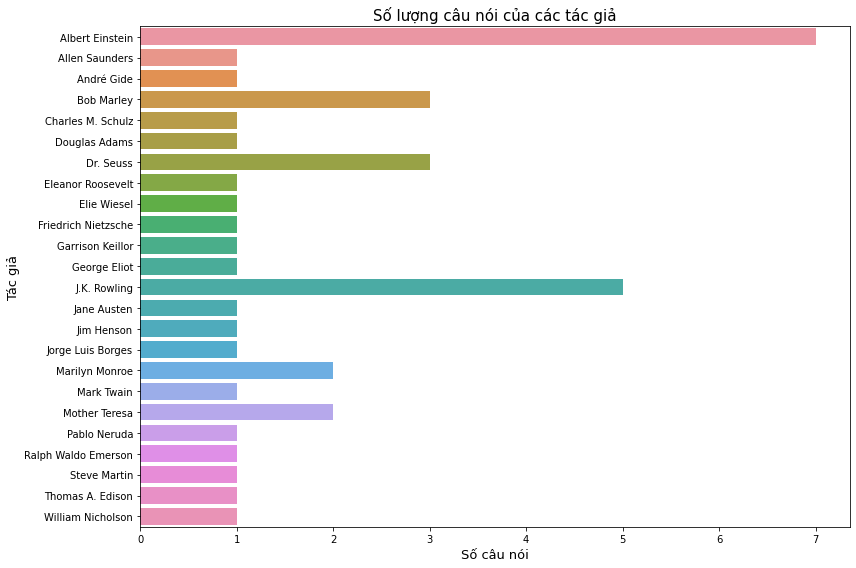

In [113]:
f, ax = plt.subplots(figsize=(12,8))
x = sns.barplot(x=author_count.values, y=author_count.index)
ax.set_ylabel('Tác giả', fontsize = 13)
ax.set_xlabel('Số câu nói', fontsize = 13)
ax.set_title('Số lượng câu nói của các tác giả', fontsize = 15)
f.tight_layout()
plt.show()

> Biểu đồ thể hiện độ dài câu nói của tác giả

In [114]:
df['Len_quote'] = len_quote
x = df[['Tacgia', 'Len_quote']].sort_values(by='Len_quote', ascending=False)
x

,Tacgia,Len_quote
10,Marilyn Monroe,1082
13,Bob Marley,695
20,Pablo Neruda,317
16,Elie Wiesel,222
27,J.K. Rowling,167
26,Albert Einstein,136
24,Jim Henson,132
2,Albert Einstein,129
23,Garrison Keillor,121
0,Albert Einstein,113


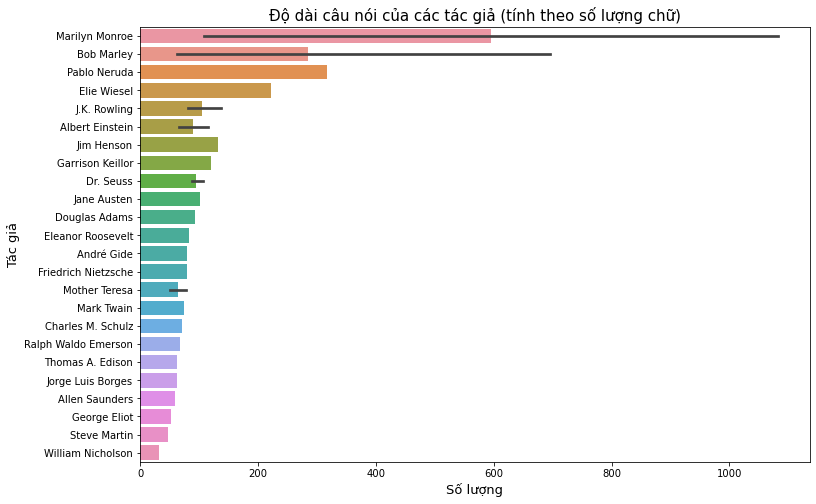

In [115]:
f, ax = plt.subplots(figsize=(12, 8))
a = sns.barplot(x=x['Len_quote'], y=x['Tacgia'])
ax.set_ylabel('Tác giả', fontsize = 13)
ax.set_xlabel('Số lượng', fontsize = 13)
ax.set_title('Độ dài câu nói của các tác giả (tính theo số lượng chữ)', fontsize = 15)
plt.show()

> Biểu đồ thể hiện số lượng từ trong câu của tác giả

In [116]:
x = df[['Tacgia', 'Count_word']].sort_values(by='Count_word', ascending=False)
x

,Tacgia,Count_word
10,Marilyn Monroe,201
13,Bob Marley,138
20,Pablo Neruda,66
16,Elie Wiesel,37
27,J.K. Rowling,32
24,Jim Henson,27
2,Albert Einstein,26
26,Albert Einstein,25
23,Garrison Keillor,24
11,J.K. Rowling,23


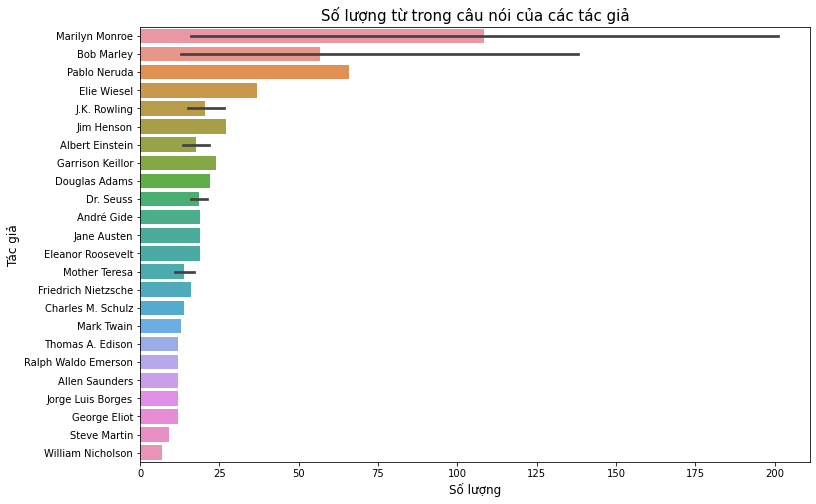

In [117]:
f, ax = plt.subplots(figsize=(12, 8))
a = sns.barplot(x=x['Count_word'], y=x['Tacgia'])
ax.set_title('Số lượng từ trong câu nói của các tác giả', fontsize=15)
ax.set_xlabel('Số lượng', fontsize=12)
ax.set_ylabel('Tác giả', fontsize=12)
plt.show()

> Biểu đồ nhiệt thể hiện mối tương quan giữa các thuộc tính trong dataframe

In [120]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
encoder = LabelEncoder()

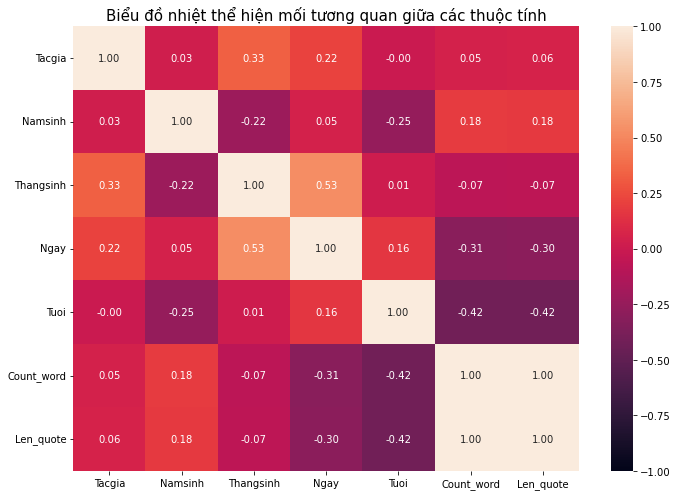

In [139]:
# Chuyển trường Tuoi về int
df['Tuoi'] = df['Tuoi'].astype(int)

#Tạo 1 dataframe mới chưa các trường muốn thế hiện mối tương quan
df_corr = df.drop('STT', axis=1)
#Mã hóa tên tác giả
encoder = LabelEncoder()
df_corr['Tacgia'] = encoder.fit_transform(df_corr.Tacgia)
#Chuyển trường Namsinh về int
df_corr['Namsinh'] = df_corr['Namsinh'].astype(int)
#Tách Ngaysinh thành ngày, tháng
thang = df_corr['Ngaysinh'].str.slice(start=5,stop=7).astype(int)
df_corr.insert(4, 'Thangsinh', thang)
ngacoy = df_corr['Ngaysinh'].str.slice(start=8).astype(int)
df_corr.insert(5, 'Ngay', ngay)


# Vẽ biểu đồ
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)
ax.set_title('Biểu đồ nhiệt thể hiện mối tương quan giữa các thuộc tính', fontsize=15)
f.tight_layout()
plt.show()

In [140]:
df

,STT,Link,Tacgia,Ngaysinh,Namsinh,Tuoi,Quote,Count_word,Len_quote
0,1,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,1879,76,The world as we have created it is a process o...,21,113
1,2,http://quotes.toscrape.com//author/J-K-Rowling,J.K. Rowling,1965-07-31,1965,57,"It is our choices, Harry, that show what we tr...",16,83
2,3,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,1879,76,There are only two ways to live your life. One...,26,129
3,4,http://quotes.toscrape.com//author/Jane-Austen,Jane Austen,1775-12-16,1775,41,"The person, be it gentleman or lady, who has n...",19,102
4,5,http://quotes.toscrape.com//author/Marilyn-Monroe,Marilyn Monroe,1926-06-01,1926,36,"Imperfection is beauty, madness is genius and ...",16,109
5,6,http://quotes.toscrape.com//author/Albert-Eins...,Albert Einstein,1879-03-14,1879,76,Try not to become a man of success. Rather bec...,14,65
6,7,http://quotes.toscrape.com//author/Andre-Gide,André Gide,1869-11-22,1869,81,It is better to be hated for what you are than...,19,80
7,8,http://quotes.toscrape.com//author/Thomas-A-Ed...,Thomas A. Edison,1847-02-11,1847,84,"I have not failed. I've just found 10,000 ways...",12,63
8,9,http://quotes.toscrape.com//author/Eleanor-Roo...,Eleanor Roosevelt,1884-10-11,1884,78,A woman is like a tea bag; you never know how ...,19,83
9,10,http://quotes.toscrape.com//author/Steve-Martin,Steve Martin,1945-08-14,1945,77,"A day without sunshine is like, you know, night.",9,48


* Tương quan giữa các tác giả

In [141]:
cols_to_analyze = ['Tuoi', 'Count_word']
df = df.dropna(subset=cols_to_analyze)

In [142]:
from sklearn.cluster import KMeans

# Lựa chọn số lượng cụm
n_clusters = 3

# Khởi tạo đối tượng KMeans
kmeans = KMeans(n_clusters=n_clusters)

# Tiến hành phân tích gom cụm
kmeans.fit(df[cols_to_analyze])

# Lưu nhãn của từng điểm dữ liệu vào cột 'Cluster'
df['Cluster'] = kmeans.labels_

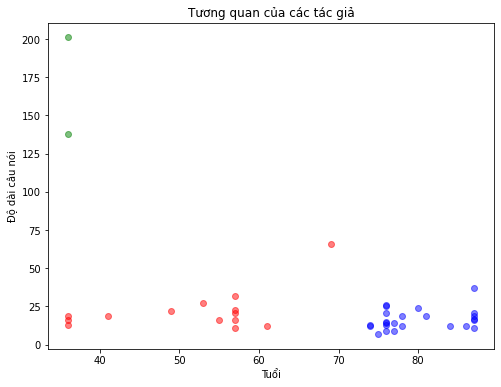

In [143]:
import matplotlib.pyplot as plt

# Lấy giá trị của cột 'Tuoi' và 'DoDaiCauNoi' của từng cụm
cluster_data = [df.loc[df['Cluster'] == i, cols_to_analyze] for i in range(n_clusters)]

# Tạo biểu đồ scatter
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(n_clusters):
    ax.scatter(cluster_data[i]['Tuoi'], cluster_data[i]['Count_word'], c=colors[i], alpha=0.5)

# Đặt tiêu đề và nhãn trục
ax.set_title('Tương quan của các tác giả')
ax.set_xlabel('Tuổi')
ax.set_ylabel('Độ dài câu nói')

# Hiển thị biểu đồ
plt.show()

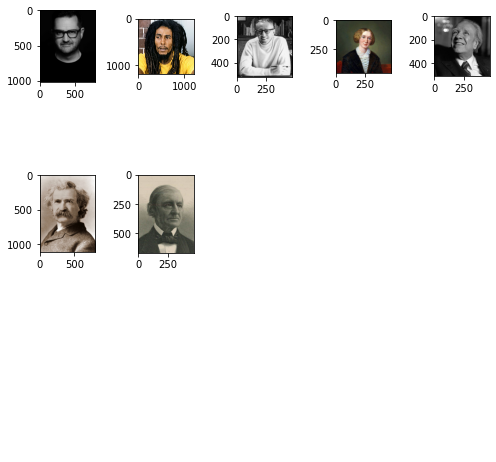

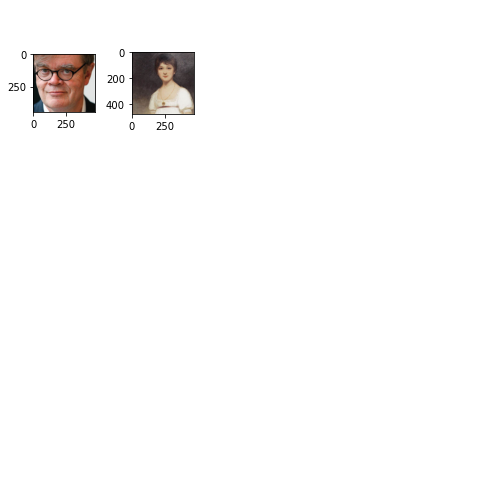

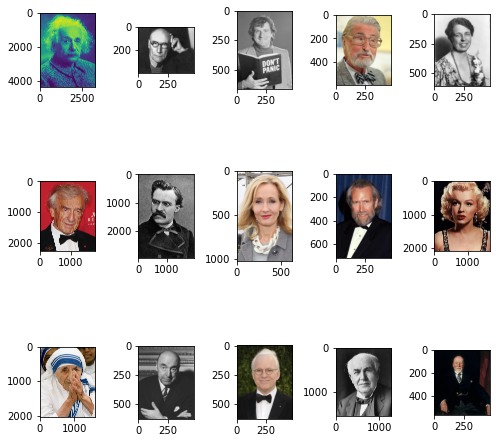

In [144]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
# import cv2
from sklearn.cluster import KMeans


# Lấy danh sách tên các file ảnh
c_data_path = './IMAGE/'
L = os.listdir(c_data_path)

# Thiết lập số lượng ảnh trong mỗi hàng và cột
n_row = 3
n_col = 5


# Tạo file ảnh cho mỗi cụm
for i in range(n_clusters):
    # Lấy danh sách các tên file ảnh thuộc cụm i
    img_list = [filename for filename, label in zip(L, kmeans.labels_) if label == i]

    # Hiển thị các ảnh trong cụm i
    _, axs = plt.subplots(n_row, n_col, figsize=(7, 7))
    axs = axs.flatten()
    for img, ax in zip(img_list[:36], axs):
        ax.imshow(mpimg.imread(os.path.join(c_data_path,img)))
        # Lấy giá trị trung bình của cột 'Tuoi' và 'DoDaiCauNoi' của cụm i
        avg_tuoi = df.loc[df['Cluster'] == i, 'Tuoi'].mean()
        avg_do_dai_cau_noi = df.loc[df['Cluster'] == i, 'Count_word'].mean()
    if len(img_list) < n_row * n_col:
        for j in range(len(img_list), n_row * n_col):
            axs[j].axis('off')
    print('\n')
    plt.tight_layout()
    plt.show()

### 3.2.3. Trích xuất đặc trưng- Feature Extraction:

In [145]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load dữ liệu từ file CSV
data = pd.read_csv('Quote.csv')

# Khởi tạo CountVectorizer để trích xuất đặc trưng từ câu nói nổi tiếng
vectorizer = CountVectorizer(stop_words='english')

# Tạo ma trận đặc trưng bằng cách trích xuất tần suất xuất hiện của các từ khóa trong câu nói nổi tiếng
X = vectorizer.fit_transform(data['Quote'])

# Hiển thị danh sách các từ khóa đã trích xuất
features = list(vectorizer.vocabulary_.keys())
print('Danh sách các từ khóa đã trích xuất: \n', features)

# Hiển thị ma trận đặc trưng
print('Ma trận đặc trưng: \n', X.toarray())

Danh sách các từ khóa đã trích xuất: 
 ['world', 'created', 'process', 'thinking', 'changed', 'changing', 'choices', 'harry', 'truly', 'far', 'abilities', 'ways', 'live', 'life', 'miracle', 'person', 'gentleman', 'lady', 'pleasure', 'good', 'novel', 'intolerably', 'stupid', 'imperfection', 'beauty', 'madness', 'genius', 'better', 'absolutely', 'ridiculous', 'boring', 'try', 'man', 'success', 'value', 'hated', 'loved', 'failed', 've', 'just', '10', '000', 'won', 'work', 'woman', 'like', 'tea', 'bag', 'know', 'strong', 'hot', 'water', 'day', 'sunshine', 'night', 'make', 'matter', 'going', 'mess', 'universal', 'truth', 'decide', 'girls', 'friends', 'll', 'act', 'remember', 'come', 'ones', 'stay', 'true', 'best', 'don', 'let', 'sisters', 'lovers', 'baby', 'hate', 'say', 'actually', 'pretty', 'break', 'heart', 'soulmate', 'half', 'makes', 'goes', 'fail', 'doesn', 'mean', 'gonna', 'trying', 'hold', 'believe', 'sweetie', 'head', 'high', 'chin', 'importantly', 'smiling', 'beautiful', 'thing', 

### 3.2.4. Suy luận:

* Dự đoán tên của người nổi tiếng theo câu nói

In [146]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Chuẩn bị dữ liệu
data = pd.read_csv('Quote.csv')
X = data['Quote']
y = data['Tacgia']

# Tiền xử lý dữ liệu
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# Chia bộ dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)

# Dự đoán tên tác giả từ câu nói mới
new_text = "Good friends, good books, and a sleepy conscience: this is the ideal life."
X_new = vectorizer.transform([new_text])
y_pred = model.predict(X_new)

print("Tác giả: ",y_pred[0])

# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Tỉ lệ phù hợp trên tập kiểm tra: {}%'.format(accuracy*100))


Tác giả:  Mark Twain
Tỉ lệ phù hợp trên tập kiểm tra: 12.5%


* Tính độ tương đồng phong cách nói giữa các tác giả và tìm ra các tác giả có phong cách nói tương đồng nhau nhất

In [147]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('Quote.csv')
# Tính ma trận tần suất xuất hiện của từ cho toàn bộ dữ liệu
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Quote'])

# Tính ma trận cosine similarity giữa các tác giả
authors = data['Tacgia'].unique()
n_authors = len(authors)
sim_matrix = np.zeros((n_authors, n_authors))
for i, author1 in enumerate(authors):
    idx1 = np.where(data['Tacgia'] == author1)[0]
    X1 = X[idx1, :]
    for j, author2 in enumerate(authors):
        idx2 = np.where(data['Tacgia'] == author2)[0]
        X2 = X[idx2, :]
        sim_matrix[i, j] = cosine_similarity(np.array(X1.sum(axis=0)), np.array(X2.sum(axis=0)))


# Tìm ra cặp tác giả có độ tương đồng lớn nhất
max_sim = 0
max_pair = ()
for i in range(n_authors):
    for j in range(i+1, n_authors):
        if sim_matrix[i, j] > max_sim:
            max_sim = sim_matrix[i, j]
            max_pair = (authors[i], authors[j])
print(f"Hai tác giả có phong cách nói tương đồng nhau nhất: {max_pair} (độ tương đồng = {max_sim:.2f})")


Hai tác giả có phong cách nói tương đồng nhau nhất: ('Albert Einstein', 'J.K. Rowling') (độ tương đồng = 0.56)
